# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In the context of the CRISP-DM framework, the business goal of identifying key factors influencing used car prices can be technically reframed as a data analysis task where the objective is to model and predict used car prices based on various features. This entails:

1. **Data Understanding and Preparation:** Collecting, cleaning, and preprocessing the dataset of 426K used cars to ensure it is suitable for analysis. This includes handling missing values, outlier detection, and feature engineering to extract or enhance relevant information.

1. **Feature Selection and Data Exploration:** Identifying potential predictors of car prices through exploratory data analysis (EDA). This involves analyzing the relationships between various car attributes (such as make, model, mileage, age, condition) and the price using statistical summaries and visualizations.

1. **Modeling:** Developing predictive models using regression techniques to estimate car prices based on identified features. This step will involve selecting appropriate modeling techniques, training the models on the dataset, and validating them using a portion of the data set aside for testing.

1. **Evaluation:** Assessing the performance of the models using metrics such as R-squared, Mean Squared Error (MSE), or Mean Absolute Error (MAE) to determine how well they predict car prices and which features are most influential.

1. **Deployment and Recommendation:** Providing actionable insights and recommendations to the used car dealership based on the findings from the models. This includes advising on which car features are valued by consumers and should therefore be prioritized or highlighted in their sales strategy.

By following these steps, the task aligns technical data analysis processes with the overarching business objective of understanding consumer preferences and pricing dynamics in the used car market.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Steps to Understand and Explore the Dataset

#### Load the Data:
- Import the dataset into a pandas DataFrame to examine its structure and contents.

#### Initial Inspection:
- Display the first few rows using `head()` and the last few rows using `tail()` to get a sense of the data.
- Use `info()` to understand the data types of each column and check for null values.
- Use `describe()` to get summary statistics of numerical columns.

#### Check for Missing Values:
- Calculate the percentage of missing values for each column.
- Visualize missing data patterns using heatmaps or missing value plots.

#### Data Types and Conversion:
- Verify that each column has the appropriate data type (e.g., numerical, categorical).
- Convert data types if necessary (e.g., dates to datetime objects, categorical data to category types).

#### Unique Values and Cardinality:
- Examine the unique values of categorical columns using `unique()` and `value_counts()`.
- Check for columns with high cardinality which might need encoding or binning.

#### Statistical Summaries:
- Generate summary statistics for numerical columns to understand the distribution, central tendency, and spread.
- Calculate summary statistics for categorical columns to understand the frequency distribution.

#### Data Distribution and Outliers:
- Visualize the distribution of numerical variables using histograms or box plots.
- Identify outliers and decide on a treatment strategy (e.g., capping, removal).

#### Correlation Analysis:
- Compute the correlation matrix for numerical variables.
- Visualize correlations using a heatmap to identify strong relationships between features.

#### Exploratory Data Analysis (EDA):
- Use scatter plots, bar plots, and pair plots to explore relationships between features and the target variable (price).
- Perform group-by operations to compare average prices across different categories (e.g., make, model, year).

#### Data Quality Issues:
- Identify and address data quality issues such as:
  - Inconsistent data entries (e.g., different spellings of the same category).
  - Duplicate rows.
  - Irrelevant or redundant columns.
  - Invalid values (e.g., negative prices or mileage).

#### Feature Engineering:
- Create new features that might be useful for the analysis (e.g., age of the car derived from the manufacturing year).
- Normalize or scale numerical features if needed for certain algorithms.

#### Documentation:
- Document the findings and decisions made during the data understanding phase.
- Summarize the insights gained about the dataset and its potential to inform the business understanding.


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.inspection import permutation_importance

import pandas as pd
import numpy as np

# Suppress FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
df = pd.read_csv('data/vehicles.csv')

df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
86460,7313963176,new haven,10800,2012.0,hyundai,veracruz,good,6 cylinders,gas,90700.0,clean,automatic,KM8NU4CC1CU200658,fwd,NaN,other,grey,ct
341599,7302177201,york,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,pa
109285,7311829892,sarasota-bradenton,29980,2018.0,rover,evoque,excellent,NaN,gas,43940.0,clean,automatic,SALVP2RX5JH292494,4wd,NaN,SUV,NaN,fl
43533,7313681585,orange county,29950,2017.0,chevrolet,silverado 2500 hd,excellent,8 cylinders,gas,172769.0,clean,automatic,1GC1KVEG4HF103027,4wd,full-size,truck,silver,ca
198521,7313572988,detroit metro,0,2016.0,dodge,grand caravan sxt,excellent,6 cylinders,gas,148533.0,clean,automatic,NaN,fwd,mid-size,mini-van,grey,mi


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

#### Check for Missing Values

In [15]:
missing_values = df.isnull().mean() * 100
print(missing_values)

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


#### Visualize Missing Data

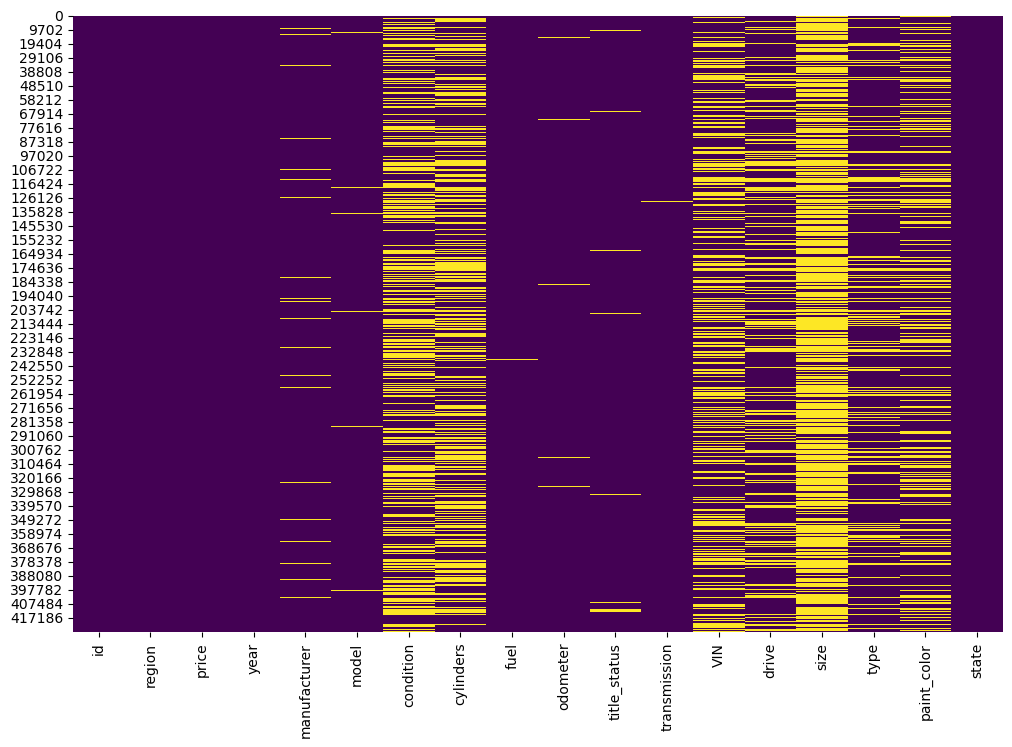

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

#### Unique Values and Cardinality

In [21]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")
print(f"year: {df['year'].nunique()} unique values")

region: 404 unique values
manufacturer: 42 unique values
model: 29649 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 118246 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
state: 51 unique values
year: 114 unique values


In [23]:
# show the top models
top_models = df['model'].value_counts().nlargest(100).index
top_models

Index(['f-150', 'silverado 1500', '1500', 'camry', 'silverado', 'accord',
       'wrangler', 'civic', 'altima', 'escape', '2500', 'tacoma', 'explorer',
       'grand cherokee', 'corolla', 'mustang', 'fusion', 'equinox', 'cr-v',
       'focus', 'malibu', 'tahoe', 'charger', 'corvette', 'rav4', 'sonata',
       'impala', 'sierra 1500', 'grand caravan', 'cruze', 'outback',
       'silverado 2500hd', 'f-250', 'elantra', 'odyssey', '3500', 'edge',
       'prius', 'tundra', 'jetta', 'rogue', 'forester', 'sentra', 'sierra',
       'wrangler unlimited', 'camaro', 'soul', 'pilot', 'c-class', 'sienna',
       'f-350', 'f150', 'cherokee', '4runner', 'highlander', 'suburban',
       'expedition', 'traverse', 'impreza', 'optima', 'challenger', 'acadia',
       '3 series', 'sierra 2500hd', 'e-class', 'yukon', 'x5', 'santa fe',
       'taurus', '200', 'ranger', 'terrain', 'colorado', 'durango', 'f250',
       'mdx', 'sorento', 'journey', 'escalade', 'passat', 'enclave', 'maxima',
       'pathfinder',

In [25]:
for col in df.select_dtypes(include=['object']).columns:
    vals = df[col].unique()
    if len(vals) < 20:
        print(f'{col}: {vals}')

condition: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
cylinders: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
title_status: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
transmission: [nan 'other' 'automatic' 'manual']
drive: [nan 'rwd' '4wd' 'fwd']
size: [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
type: [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
paint_color: [nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']


#### Summary Statistics

In [29]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### Data Distribution

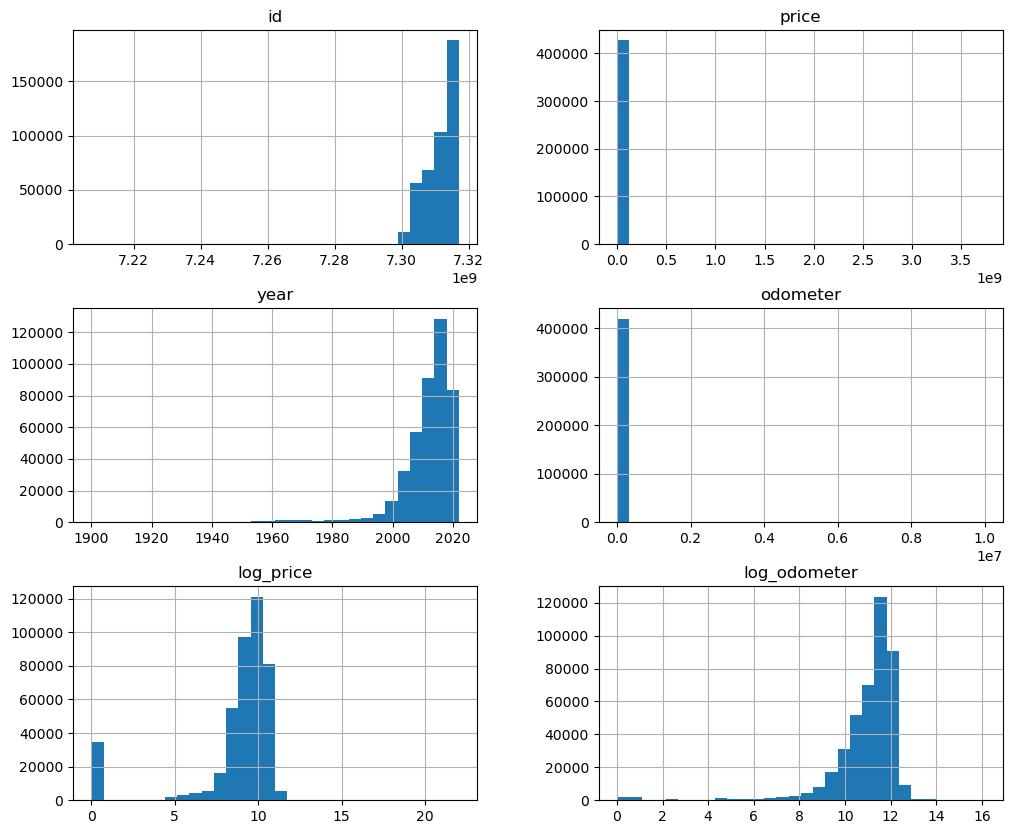

In [32]:
df['log_price'] = np.log1p(df['price'])  # Ensures safe log transformation if there are zero prices
df['log_odometer'] = np.log1p(df['odometer'])  # Similarly for odometer
df.hist(figsize=(12, 10), bins=30)
plt.savefig('plots/hist.png')
plt.show()

#### Outliers Detection

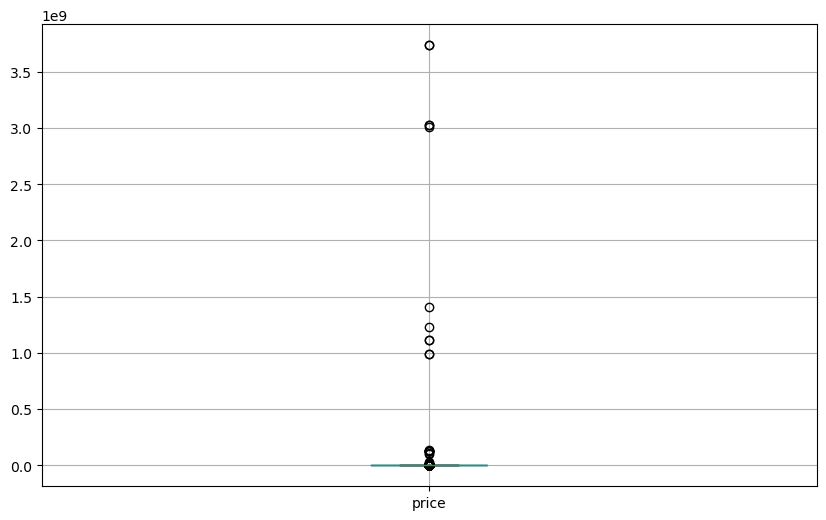

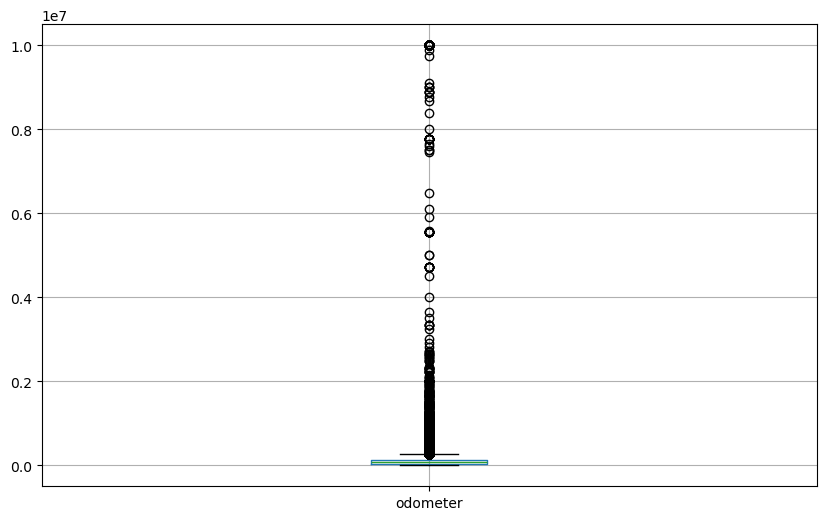

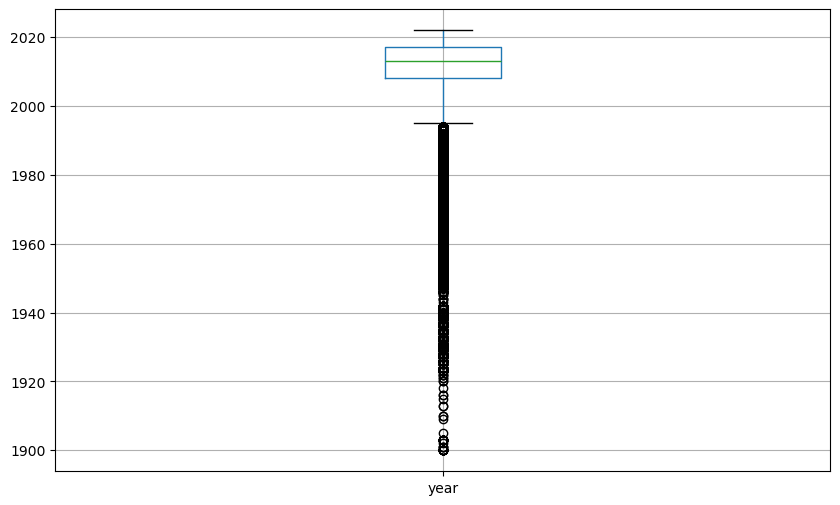

In [35]:
df[['price']].boxplot(figsize=(10, 6))
plt.savefig('plots/price_boxplot.png')
plt.show()

df[['odometer']].boxplot(figsize=(10, 6))
plt.savefig('plots/odo_boxplot.png')
plt.show()

df[['year']].boxplot(figsize=(10, 6))
plt.savefig('plots/year_boxplot.png')
plt.show()

#### Correlation Analysis

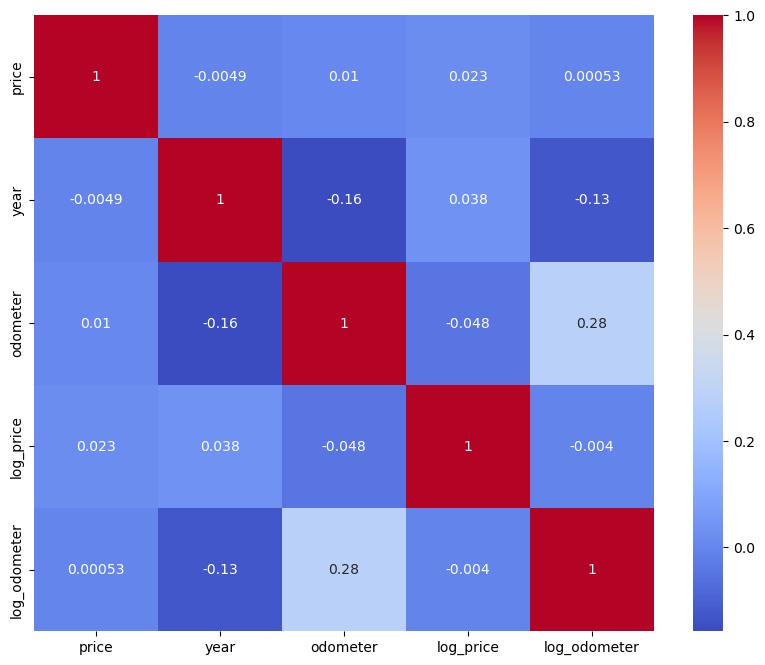

In [38]:
# Filter numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64']).drop('id', axis=1)
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('plots/heatmap.png')
plt.show()

## Exploratory Data Analysis (EDA)

<Figure size 1200x800 with 0 Axes>

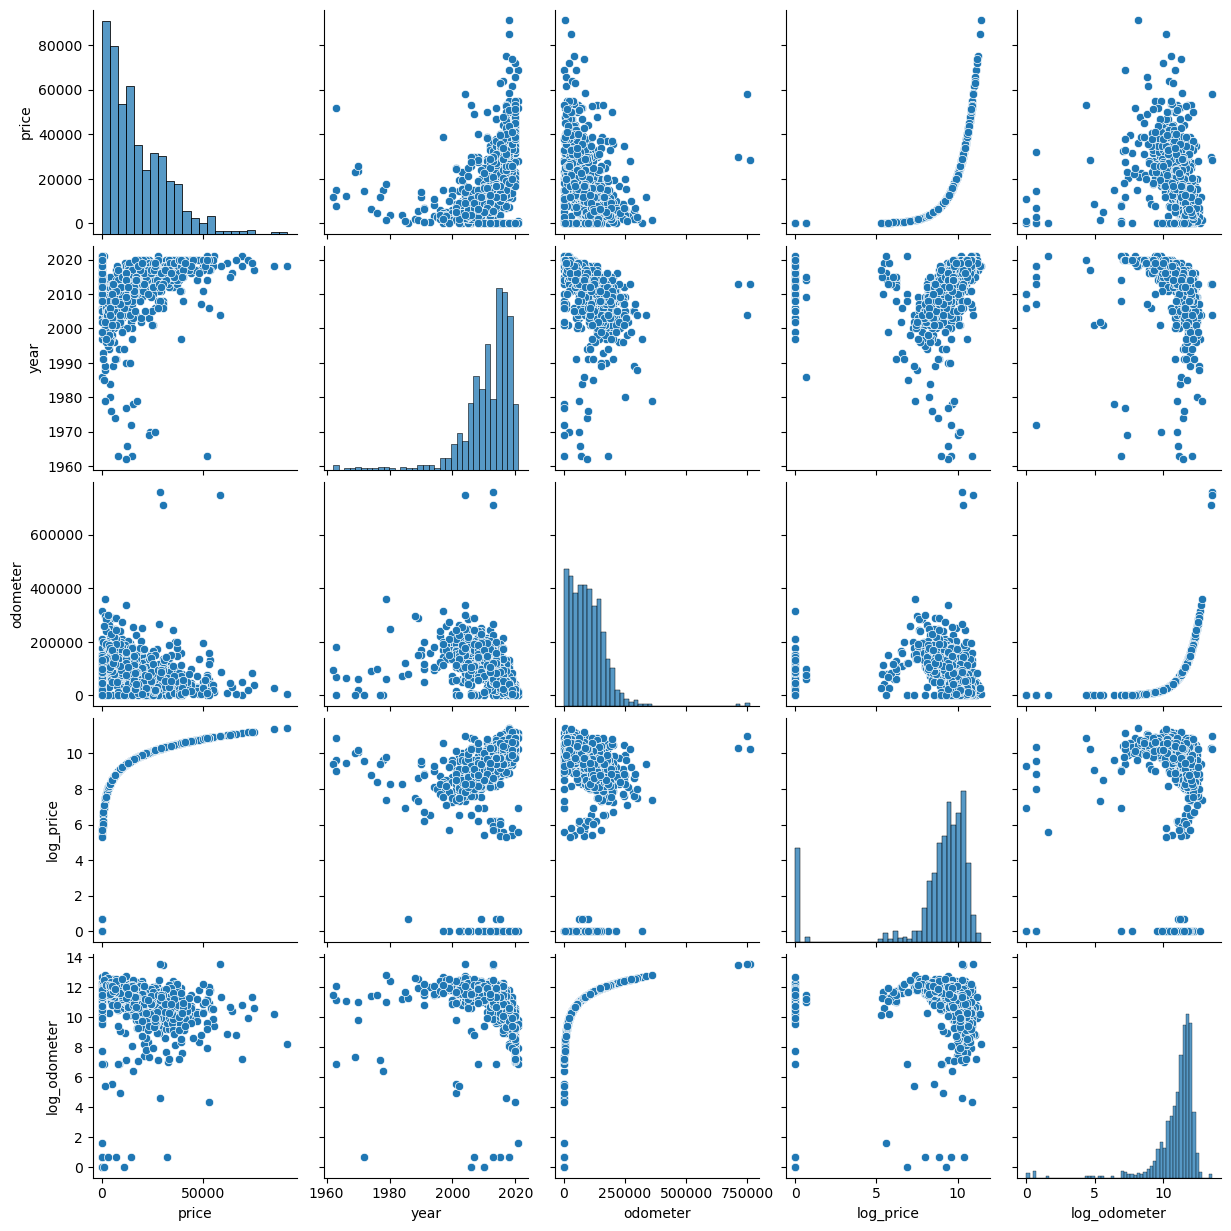

In [41]:
plt.figure(figsize=(12, 8))
# Be careful with sending large amounts of data to pairplot as it can be slow
sns.pairplot(numerical_df.sample(1000))
plt.savefig('plots/pairplot.png')
plt.show()

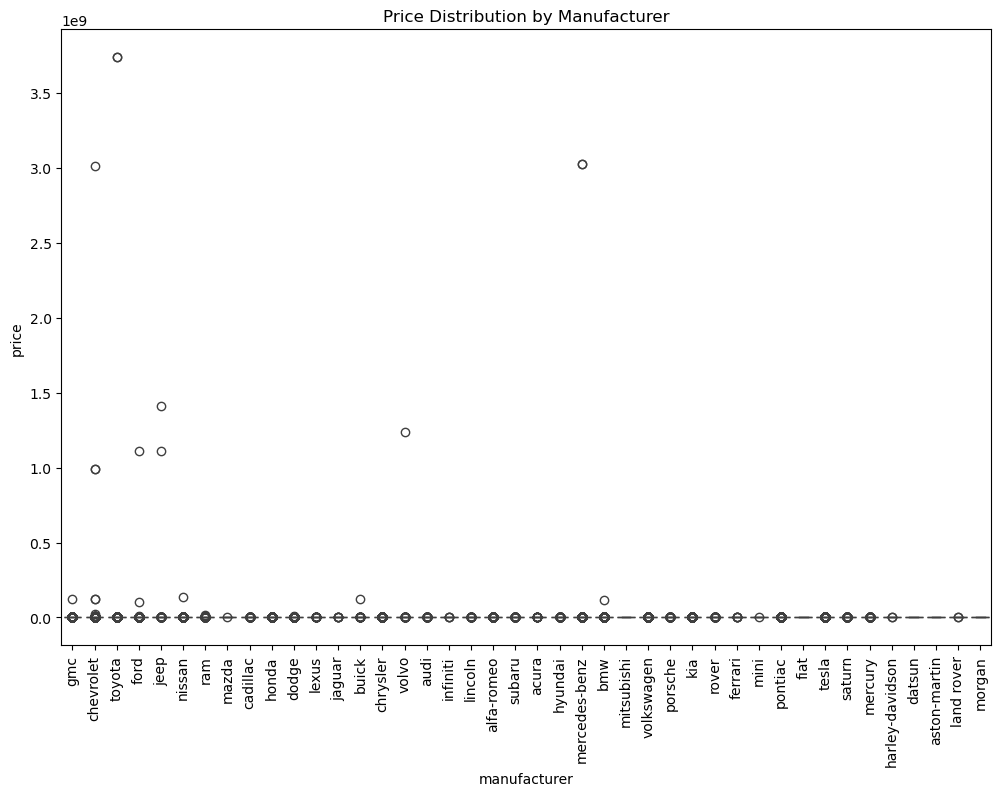

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='manufacturer', y='price', data=df)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('Price Distribution by Manufacturer')
plt.savefig('plots/manufacturer.png')
plt.show()

In [45]:
# Clip the outliers on price and odometer

price_q1 = df['price'].quantile(0.01)
price_q99 = df['price'].quantile(0.99)
df['price'] = np.clip(df['price'], price_q1, price_q99)

odometer_q1 = df['odometer'].quantile(0.01)
odometer_q99 = df['odometer'].quantile(0.99)
df['odometer'] = np.clip(df['odometer'], odometer_q1, odometer_q99)

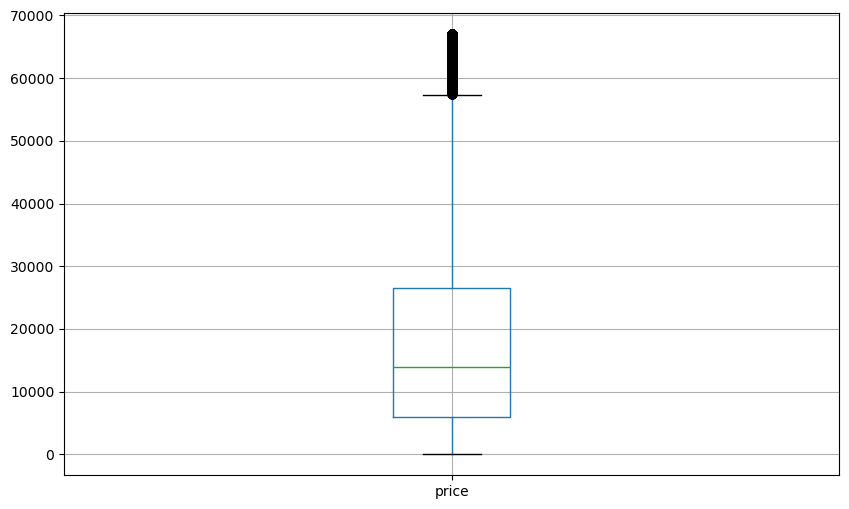

In [47]:
df[['price']].boxplot(figsize=(10, 6))
plt.savefig('plots/price_boxplot.png')
plt.show()

In [49]:
df.describe()

,id,price,year,odometer,log_price,log_odometer
count,4.268800e+05,426880.000000,425675.000000,422480.000000,426880.000000,422480.000000
mean,7.311487e+09,17264.377078,2011.235191,91546.115250,8.688693,10.926763
std,4.473170e+06,14603.459785,9.452120,63140.102982,2.775674,1.649288
min,7.207408e+09,0.000000,1900.000000,2.000000,0.000000,0.000000
25%,7.308143e+09,5900.000000,2008.000000,37704.000000,8.682877,10.537548
50%,7.312621e+09,13950.000000,2013.000000,85548.000000,9.543306,11.356845
75%,7.315254e+09,26485.750000,2017.000000,133542.500000,10.184400,11.802183
max,7.317101e+09,66995.000000,2022.000000,280000.000000,22.041530,16.118096


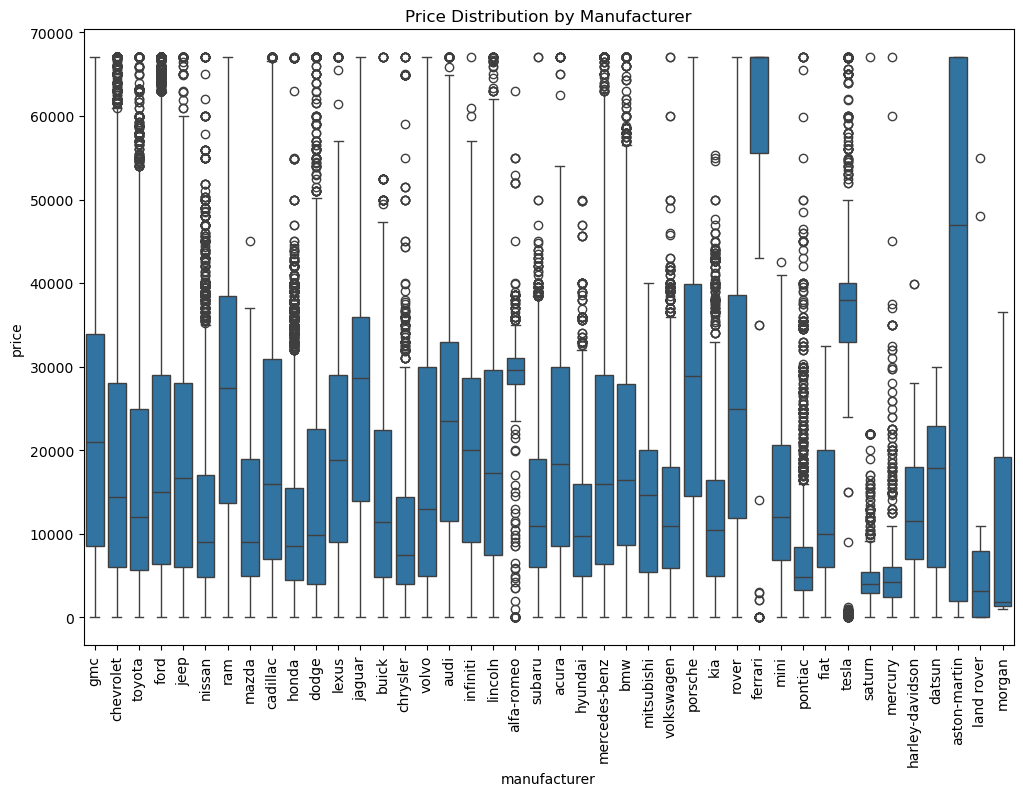

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='manufacturer', y='price', data=df)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('Price Distribution by Manufacturer')
plt.savefig('plots/manufacturer_after_clip.png')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Data Cleaning and Preprocessing

In [56]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/vehicles.csv')

# drop unneeded columns
df.drop(['VIN', 'id', 'size'], axis=1, inplace=True)

# drop values that are extremely low
df = df[df['price'] > 10]

# Clipping outliers for 'price' and 'odometer' to the 1st and 99th percentiles
price_q1 = df['price'].quantile(0.01)
price_q99 = df['price'].quantile(0.99)
df['price'] = np.clip(df['price'], price_q1, price_q99)

odometer_q1 = df['odometer'].quantile(0.01)
odometer_q99 = df['odometer'].quantile(0.99)
df['odometer'] = np.clip(df['odometer'], odometer_q1, odometer_q99)

# drop missing values
df.dropna(subset=['year', 'price', 'odometer', 'model'], inplace=True)

# fill in missing values
df['manufacturer'].fillna('Unknown', inplace=True)

# drop columns with extensive missing data
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

In [58]:
# Perform target encoding for the 'model' column
# Note: Commented out because the resulting models had higher error values
# target_mean = df['price'].groupby(df['model']).mean()
# df['model_target_enc'] = df['model'].map(target_mean)
# df.drop(columns=['model'], inplace=True)

# keep the top models
# Note: This didn't help either
#top_models = df['model'].value_counts().nlargest(50).index
#df['model'] = df['model'].where(df['model'].isin(top_models), 'other')
#top_models

In [60]:
# convert cyclinders to an integer column

df['cylinders'].replace('other', -1, inplace=True)

# Extract the numeric part from the 'cylinders' string
df['cylinders'] = df['cylinders'].str.extract(r'(\d+)').astype(float)

# set to -1 for missing values
df['cylinders'] = df['cylinders'].fillna(-1)

# Now, convert the column to integer
df['cylinders'] = df['cylinders'].astype(int)

# Print to verify
print(df['cylinders'].sample(5))

47583     8
205104    8
129353    8
155878    6
118350    4
Name: cylinders, dtype: int64


#### Feature Engineering

In [63]:
# Calculate age of the car
current_year = pd.Timestamp('now').year
df['age'] = current_year - df['year']
df['log_age'] = np.log1p(df['age'])

# Log transformation
df['log_odometer'] = np.log1p(df['odometer'])
df['log_price'] = np.log1p(df['price'])

#### Categorical Encoding

In [66]:
# Moved categorical encoding to the pipeline in the Modeling phase

df.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age,log_age,log_odometer,log_price
6690,anchorage / mat-su,38000,1955.0,ford,f1000,excellent,8,gas,5000.0,clean,automatic,rwd,NaN,purple,ak,69.0,4.248495,8.517393,10.545368
278365,rochester,3500,2008.0,ford,edge limited,like new,6,gas,160000.0,clean,automatic,4wd,other,grey,ny,16.0,2.833213,11.982935,8.160804
355244,knoxville,21590,2016.0,ram,1500 regular cab tradesman,good,6,gas,35391.0,clean,other,NaN,pickup,black,tn,8.0,2.197225,10.474241,9.980032
3530,huntsville / decatur,25590,2017.0,jaguar,xf 20d premium sedan 4d,good,-1,other,27662.0,clean,automatic,rwd,sedan,white,al,7.0,2.079442,10.227851,10.149996
122792,atlanta,17590,2015.0,subaru,legacy 2.5i premium sedan,good,-1,gas,34545.0,clean,other,NaN,sedan,white,ga,9.0,2.302585,10.450047,9.775143


#### Data Transformation

In [69]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 383953 entries, 27 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383953 non-null  object 
 1   price         383953 non-null  int64  
 2   year          383953 non-null  float64
 3   manufacturer  383953 non-null  object 
 4   model         383953 non-null  object 
 5   condition     237694 non-null  object 
 6   cylinders     383953 non-null  int64  
 7   fuel          381827 non-null  object 
 8   odometer      383953 non-null  float64
 9   title_status  376762 non-null  object 
 10  transmission  382450 non-null  object 
 11  drive         267279 non-null  object 
 12  type          301629 non-null  object 
 13  paint_color   271320 non-null  object 
 14  state         383953 non-null  object 
 15  age           383953 non-null  float64
 16  log_age       383953 non-null  float64
 17  log_odometer  383953 non-null  float64
 18  log_pric

In [71]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Filter out columns that have missing values
missing_values = missing_values[missing_values > 0]

# Display the columns with their count of missing values
print(missing_values)

condition       146259
fuel              2126
title_status      7191
transmission      1503
drive           116674
type             82324
paint_color     112633
dtype: int64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### Setup

In [75]:
X = df.drop(columns=['price', 'log_price'])  # Drop the target variable from the features
y = df['log_price']  # Target variable

In [77]:
print(f'Number of rows in X: {len(X)}')
print(f'Minimum price in the DataFrame: {df["price"].min()}')

Number of rows in X: 383953
Minimum price in the DataFrame: 275


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print(f'Length X_train: {len(X_train)} Length X_test: {len(X_test)}')

Length X_train: 307162 Length X_test: 76791


#### Linear / Ridge / Lasso Regression

In [124]:
# Define which columns need what type of processing
categorical_features = ['manufacturer', 'fuel', 'transmission', 'drive', 'type', 'title_status']
numerical_features = ['log_age', 'log_odometer', 'cylinders']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# preprocessor transforms numeric and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

models = { 
    'Linear Regression': { "model": LinearRegression(), "param_grid": { 'poly__degree': [2] } }, 
    'Ridge Regression': { "model": Ridge(), "param_grid": { 'poly__degree': [2], 'regressor__alpha': [0.01, 0.1, 1, 10, 100] } }, 
    'Lasso Regression': { "model": Lasso(), "param_grid": { 'poly__degree': [2], 'regressor__alpha': [0.01, 0.1, 1, 10, 100] } } 
}

for model_name, model_info in models.items():
    model = model_info["model"]

    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures()),
        ('regressor', model)
    ])
    
    grid_search = GridSearchCV(model_pipeline, model_info["param_grid"], cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    print(f"{model_name}: Best parameters:", grid_search.best_params_)
    print(f"{model_name}: Best cross-validation score (MSE):", -grid_search.best_score_)

    # Check results for all tested models
    cv_results_columns = ['param_poly__degree', 'mean_test_score', 'std_test_score']
    if model_name in ['Ridge Regression', 'Lasso Regression']:
        cv_results_columns = ['param_regressor__alpha'] + cv_results_columns
    cv_results = pd.DataFrame(grid_search.cv_results_)
    print('CV Results')
    print(cv_results[cv_results_columns])
    
    best_model = grid_search.best_estimator_
    model_info["best_model"] = best_model


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Linear Regression: Best parameters: {'poly__degree': 2}
Linear Regression: Best cross-validation score (MSE): 0.5154567564792882
CV Results
  param_poly__degree  mean_test_score  std_test_score
0                  2        -0.515457        0.006098
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Ridge Regression: Best parameters: {'poly__degree': 2, 'regressor__alpha': 10}
Ridge Regression: Best cross-validation score (MSE): 0.5144811260704238
CV Results
  param_regressor__alpha param_poly__degree  mean_test_score  std_test_score
0                   0.01                  2        -0.515322        0.006051
1                    0.1                  2        -0.515230        0.006052
2                      1                  2        -0.514802        0.006053
3                     10                  2        -0.514481        0.006174
4                    100                  2        -0.516035        0.006381
Fitting 5

Linear Regression: Test Score: 0.5120809187314972
Linear Regression: Test Data MSE on original price scale: 73315439.25458343
Linear Regression: Test Data RMSE on original price scale: 8562.44353292817
Linear Regression Permutation Importance
              Importance
log_age         0.334294
manufacturer    0.158697
type            0.128348
log_odometer    0.095086
fuel            0.065930
cylinders       0.052830
drive           0.038057
title_status    0.036873
transmission    0.031669
year            0.000000
odometer        0.000000
condition       0.000000
paint_color     0.000000
state           0.000000
age             0.000000
model           0.000000
region          0.000000


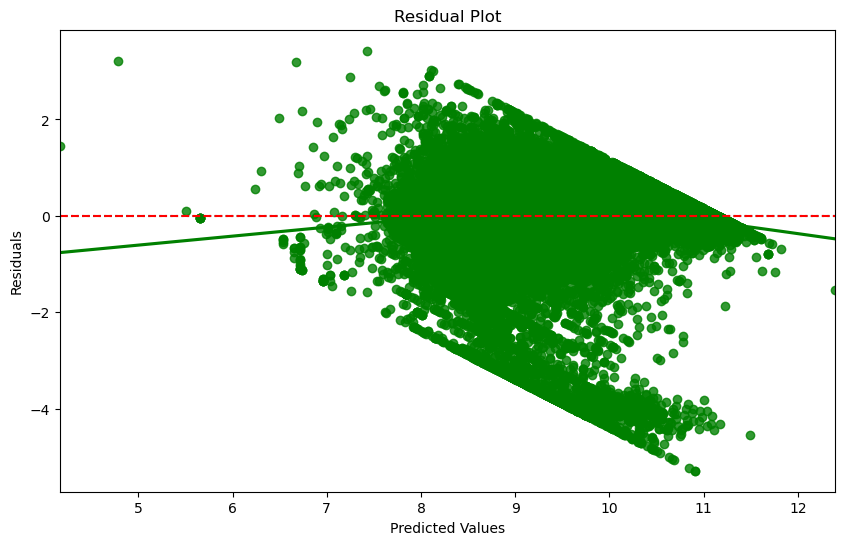

Ridge Regression: Test Score: 0.5126396513793168
Ridge Regression: Test Data MSE on original price scale: 72645178.95784695
Ridge Regression: Test Data RMSE on original price scale: 8523.214121318726
Ridge Regression Permutation Importance
              Importance
log_age         0.331262
manufacturer    0.109925
log_odometer    0.095319
type            0.095005
fuel            0.060993
cylinders       0.052432
drive           0.035068
title_status    0.034579
transmission    0.028722
year            0.000000
odometer        0.000000
condition       0.000000
paint_color     0.000000
state           0.000000
age             0.000000
model           0.000000
region          0.000000


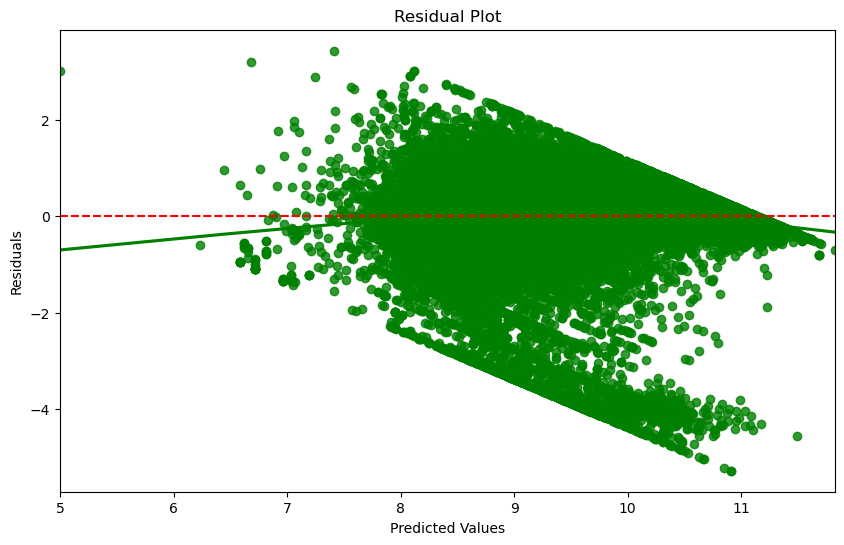

Lasso Regression: Test Score: 0.43527918590030057
Lasso Regression: Test Data MSE on original price scale: 92919830.36714903
Lasso Regression: Test Data RMSE on original price scale: 9639.493262985821
Lasso Regression Permutation Importance
              Importance
log_age         0.298763
log_odometer    0.106594
cylinders       0.055276
fuel            0.050213
drive           0.033792
type            0.018436
transmission    0.010879
title_status    0.006494
manufacturer    0.000553
year            0.000000
odometer        0.000000
condition       0.000000
model           0.000000
paint_color     0.000000
state           0.000000
age             0.000000
region          0.000000


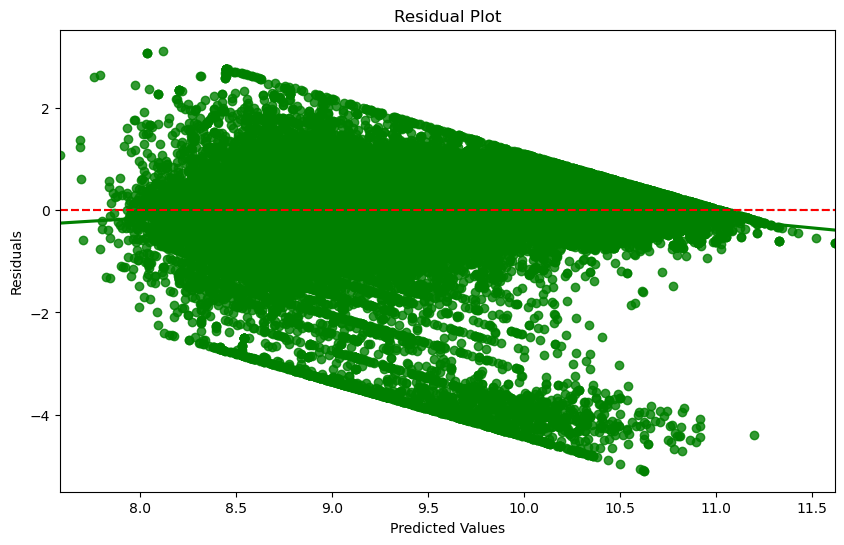

In [127]:
for model_name, model_info in models.items():
    best_model = model_info["best_model"]
    test_score = best_model.score(X_test, y_test)
    print(f"{model_name}: Test Score:", test_score)
    
    log_pred_test = best_model.predict(X_test)
    pred_original_scale_test = np.expm1(log_pred_test) # convert to original scale
    y_test_original = np.expm1(y_test) # also convert to original scale
    mse_original_scale_test = mean_squared_error(y_test_original, pred_original_scale_test)
    # Calculate RMSE on the original price scale
    rmse_original_scale_test = np.sqrt(mse_original_scale_test)
    print(f"{model_name}: Test Data MSE on original price scale:", mse_original_scale_test)
    print(f"{model_name}: Test Data RMSE on original price scale:", rmse_original_scale_test)
    # Compute permutation importance
    pi_result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    perm_importance = pd.DataFrame(pi_result.importances_mean, index=X_train.columns, columns=['Importance'])
    print(f'{model_name} Permutation Importance')
    print(perm_importance.sort_values(by='Importance', ascending=False))

    # Calculate residuals
    log_residuals = y_test - log_pred_test
    
    # Plotting the residuals
    plt.figure(figsize=(10, 6))
    sns.residplot(x=log_pred_test, y=log_residuals, lowess=True, color="g")
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.show()

### Ridge model

Given the results of the previous sections, we will proceed with the Ridge regression model for further analysis.

#### Interpret the Coefficients and Y-Intercept

In [134]:
best_ridge_pipeline = models['Ridge Regression']['best_model']
preprocessor = best_ridge_pipeline.named_steps['preprocessor']
original_feature_names = preprocessor.get_feature_names_out()
# Create a mapping from the default feature names to your original feature names
name_mapping = {f"x{i}": name for i, name in enumerate(original_feature_names)}
# Replace indices in polynomial feature names with original feature names
interpretable_feature_names = [name for name in feature_names]
for old, new in name_mapping.items():
    interpretable_feature_names = [s.replace(old, new) for s in interpretable_feature_names]
# Map the coefficients to these new interpretable names
coefficients = pd.Series(ridge_regressor.coef_, index=interpretable_feature_names)

abs_sorted_coefficients = coefficients.abs().sort_values(ascending=False)
sorted_coefficients = coefficients.sort_values()

print("Ridge Regression Coefficients:")
print(f"\nNumber of coefficients: {len(ridge_regressor.coef_)}")
print("\nSorted by absolute value in descending order:")
print(abs_sorted_coefficients)
print("\nSorted by value:")
print(sorted_coefficients)
print("\nIntercept:", intercept)

Ridge Regression Coefficients:

Number of coefficients: 3321

Sorted by absolute value in descending order:
num__cylinders0 cat__manufacturer_aston-martin0             1.107381
cat__manufacturer_Unknown3 cat__manufacturer_audi9          0.867744
cat__manufacturer_Unknown8 cat__manufacturer_alfa-romeo2    0.843928
cat__manufacturer_acura3 cat__manufacturer_aston-martin0    0.823496
cat__manufacturer_acura3 cat__manufacturer_audi0            0.788266
                                                              ...   
cat__manufacturer_Unknown cat__manufacturer_aston-martin    0.000000
num__cylinders3 cat__manufacturer_acura3                    0.000000
num__cylinders3 cat__manufacturer_acura4                    0.000000
cat__manufacturer_aston-martin num__log_odometer0           0.000000
cat__manufacturer_bmw cat__manufacturer_acura0              0.000000
Length: 3321, dtype: float64

Sorted by value:
num__cylinders0 cat__manufacturer_aston-martin0            -1.107381
cat__manufacturer

Due to the combination of one-hot encoding and the second degree polynomial features after the one-hot encoding in the preprocessing step, the number of columns total is 3321 and a bit difficult to decipher, but we can at least see that the premium manufacturers like Aston Martin tend to have the highest and lowest value coefficients due to vehicles have the most extreme prices in the dataset.

The Y-Intercept is the expected value of the (log) price when all features are zero, though that should never be the case given the one-hot encoded columns should guarantee a nonzero value in at least one of the generated features.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### Overview
The primary goal of this analysis was to identify key factors influencing used car prices, enabling used car dealers to fine-tune their inventory and pricing strategies. Through rigorous data analysis and modeling, including Linear Regression, Ridge Regression, and Lasso Regression, I sought to uncover which features significantly affect car valuations.

#### Model Performance Summary
- Linear Regression provided a baseline with an $R^{2}$ score of 0.512 and an RMSE of 8,562 on the test dataset.  The top 3 values in the permutation importance were age (i.e. year), manufacturer, and type.
- Ridge Regression results were only very slightly better than Linear Regression in both the cross-validated and test metrics, with an $R^{2}$ score of 0.513 and an RMSE of 8,523.  For feature importance, the results of Ridge Regression agreed for the most part with Linear Regression, in that age, manufacturer, and type were the most important.
- Lasso Regression did not perform as well as the others, with an $R^{2}$ of 0.435 and the highest RMSE at 9,639.  This suggests underfitting due to the restriction on feature size.

One interesting result found while building the models was that having the polynomial features applied to all features after the preprocessing step, including the categorical features that were one-hot encoded, instead of just to the numerical features, resulted in more accurate models than only applying the polynomial features to the numerical features.  This implies some cross-feature insights.  For example, it could mean the impact of a car's age could vary by manufacturer.

#### Feature Importance
By far, the most important feature in all the models built was year (age).  The next most important numerical feature was odometer.  For categorical features, at the top of the list are manufacturer and type, except for the Lasso model where manufacturer's importance was minimized.

#### Statistical and Business Implications
The analysis confirms well-known industry insights that newer, less-driven cars generally command higher prices. However, the significant impact of the manufacturer and type provides a data-driven confirmation that brand and car type strongly influence buyer preferences and thus pricing. These insights can directly inform stock acquisition strategies focusing on newer, popular models from preferred manufacturers.

#### Recommendations for Future Analysis
While the current models provide valuable insights, the prediction accuracy can still be enhanced by:
- Incorporating features such as paint color, state / region, and model.  Model was a particularly tricky feature, as it seems like it would feature highly in the list of important features, but the very high cardinality of the column meant one-hot encoding was out of the question.  Target Encoding was attempted on the 'model' feature but the resulting RMSE on the test data was higher than without the model feature entirely, so the 'model' column was ignored while building the regression models.  I suppose having 'type' and 'size', combined with 'manufacturer', might be enough to make the 'model' column unnecessary.
- Exploring other machine learning methods like Random Forests and Gradient Boosting to better capture complex relationships.
- Adding more data, as the original dataset was 3 million records and we are only working on a subset of 426K cars.
- Filling in missing data, particularly 'size' and 'type'.  Perhaps those two columns could be filled in based on the 'model' column if we could find a mapping that relates 'model' to 'size' and 'type'.

#### Conclusion
The project successfully identifies key predictors of used car prices, offering actionable insights that can aid dealers in optimizing their inventory and pricing strategies. Continuing to refine these models by incorporating more nuanced features and advanced modeling techniques will likely yield even more precise predictions and richer insights.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Executive Summary
This report presents the findings from the predictive modeling project aimed at identifying key drivers of used car prices. Our analysis incorporated various machine learning models to determine the factors most significantly affecting car values, helping you, the used car dealers, to optimize your inventory and pricing strategies.

#### Model Summary

- Models Deployed: We deployed Linear Regression, Ridge Regression, and Lasso Regression models, incorporating features such as year, mileage, number of cylinders, manufacturer, fuel type, vehcile type, transmission type, drive type, and title status.
- Best Performing Model: The Ridge Regression model showed the best overall performance with the highest $R{2}$ score and the lowest RMSE, indicating its superior predictive accuracy among the tested models.

#### Key Findings

- Significant Predictors: The analysis highlighted year and mileage as some of the most influential predictors of used car prices, indicating that newer and less-used cars are priced higher.  In particular, year was the most influential predictor of all features by a wide margin.
- Impact of Vehicle Type and Manufacturer: Categorical features such as manufacturer and vehicle type also significantly impact car prices, suggesting brand value and car type play critical roles in determining car prices.

#### Recommendations
1. Inventory Selection:
   - Prioritize stocking newer, low-mileage cars as they tend to retain more value.
   - Focus on brands and types that are revealed as more valuable through our model to cater to higher demand and profitability.
2. Pricing Strategy:
   - Utilize the model to set competitive prices based on a car’s features like age, mileage, and type.
   - Adjust prices dynamically based on incoming data and market trends using the model’s predictive capabilities.
3. Marketing Focus:
   - Highlight the quality aspects of cars, such as low mileage and popular manufacturers or types, in marketing materials to align with factors that drive prices up.

#### Technical Overview

- Data Processing: Data was cleaned and preprocessed to handle missing values and encode categorical features.
- Feature Engineering: Polynomial features were introduced to capture non-linear relationships, significantly enhancing model performance.
- Some features were dropped as unnecessary, such as VIN and ID, while others such as 'model' were dropped due to how they negatively affected the resulting model predictions and/or due to high cardinality.

#### Implementation Plan

- Model Deployment: The Ridge Regression model will be implemented into a dynamic pricing tool that integrates with your current inventory system.
- Performance Monitoring: We will set up a dashboard to monitor model performance and pricing trends in real-time.
- Continuous Improvement: Scheduled retraining sessions and model updates as new sales data becomes available or when significant market shifts occur.

#### Conclusion
The deployment of this predictive model marks a significant step forward in how you can strategically manage inventory and pricing. By leveraging detailed insights from our analysis, you can not only enhance profitability but also better meet consumer demands.